# 5. Resampling Methods – Applied

Excercises from **Chapter 5** of [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/) by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani.

I've elected to use Python instead of R.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from IPython.display import display, HTML
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import datasets
from scipy import stats

In [2]:
def confusion_table(confusion_mtx):
    """Renders a nice confusion table with labels"""
    confusion_df = pd.DataFrame({'y_pred=0': np.append(confusion_mtx[:, 0], confusion_mtx.sum(axis=0)[0]),
                                 'y_pred=1': np.append(confusion_mtx[:, 1], confusion_mtx.sum(axis=0)[1]),
                                 'Total': np.append(confusion_mtx.sum(axis=1), ''),
                                 '': ['y=0', 'y=1', 'Total']}).set_index('')
    return confusion_df

def total_error_rate(confusion_matrix):
    """Derive total error rate from confusion matrix"""
    return 1 - np.trace(confusion_mtx) / np.sum(confusion_mtx)

### 5. In Chapter 4, we used logistic regression to predict the probability of default using income and balance on the Default data set. We will now estimate the test error of this logistic regression model using the validation set approach. Do not forget to set a random seed before beginning your analysis.

In [3]:
default_df = pd.read_csv('./data/Default.csv', index_col='Unnamed: 0')
default_df = default_df.reset_index().drop('index', axis=1)

# Check for missing
assert default_df.isna().sum().sum() == 0

# Rationalise types
default_df = pd.get_dummies(default_df, dtype=np.float64).drop(['default_No', 'student_No'], axis=1)

display(default_df.head())

,balance,income,default_Yes,student_Yes
0,729.526495,44361.625074,0.0,0.0
1,817.180407,12106.134700,0.0,1.0
2,1073.549164,31767.138947,0.0,0.0
3,529.250605,35704.493935,0.0,0.0
4,785.655883,38463.495879,0.0,0.0


### (a) Fit a logistic regression model that uses income and balance to predict default.
### (b) Using the validation set approach, estimate the test error of this model. In order to do this, you must perform the following steps:

- i. Split the sample set into a training set and a validation set.
- ii. Fit a multiple logistic regression model using only the training observations.
- iii. Obtain a prediction of default status for each individual in the validation set by computing the posterior probability of default for that individual, and classifying the individual to the default category if the posterior probability is greater than 0.5.
- iv. Compute the validation set error, which is the fraction of the observations in the validation set that are misclassified.

### (c) Repeat the process in (b) three times, using three different splits of the observations into a training set and a validation set. Com- ment on the results obtained.

In [4]:
for s in range(1,4):
    display(HTML('<h3>Random seed = {}</h3>'.format(s)))
    # Create index for 50% holdout set
    np.random.seed(s)
    train = np.random.rand(len(default_df)) < 0.5
    
    response   = 'default_Yes'
    predictors = ['income', 'balance']
    
    X_train = np.array(default_df[train][predictors])
    X_test  = np.array(default_df[~train][predictors])
    y_train = np.array(default_df[train][response])
    y_test  = np.array(default_df[~train][response])
    
    # Logistic regression
    logit       = LogisticRegression()
    model_logit = logit.fit(X_train, y_train)
    
    # Predict
    y_pred = model_logit.predict(X_test)
    
    # Analysis
    confusion_mtx = confusion_matrix(y_test, y_pred)
    display(confusion_table(confusion_mtx))
    
    total_error_rate_pct = np.around(total_error_rate(confusion_mtx) * 100, 4)
    print('total_error_rate: {}%'.format(total_error_rate_pct))


,y_pred=0,y_pred=1,Total
,,,
y=0,4846,0,4846
y=1,164,0,164
Total,5010,0,


total_error_rate: 3.2735%


,y_pred=0,y_pred=1,Total
,,,
y=0,4691,1,4692
y=1,176,0,176
Total,4867,1,


total_error_rate: 3.636%


,y_pred=0,y_pred=1,Total
,,,
y=0,4773,1,4774
y=1,163,0,163
Total,4936,1,


total_error_rate: 3.3219%


### (d) Now consider a logistic regression model that predicts the probability of default using income, balance, and a dummy variable for student. Estimate the test error for this model using the validation set approach. Comment on whether or not including a dummy variable for student leads to a reduction in the test error rate.

In [5]:
for s in range(1,4):
    display(HTML('<h3>Random seed = {}</h3>'.format(s)))
    # Create index for 50% holdout set
    np.random.seed(s)
    train = np.random.rand(len(default_df)) < 0.5
    
    response   = 'default_Yes'
    predictors = ['income', 'balance', 'student_Yes']
    
    X_train = np.array(default_df[train][predictors])
    X_test  = np.array(default_df[~train][predictors])
    y_train = np.array(default_df[train][response])
    y_test  = np.array(default_df[~train][response])
    
    # Logistic regression
    logit       = LogisticRegression()
    model_logit = logit.fit(X_train, y_train)
    
    # Predict
    y_pred = model_logit.predict(X_test)
    
    # Analysis
    confusion_mtx = confusion_matrix(y_test, y_pred)
    display(confusion_table(confusion_mtx))
    
    total_error_rate_pct = np.around(total_error_rate(confusion_mtx) * 100, 4)
    print('total_error_rate: {}%'.format(total_error_rate_pct))

,y_pred=0,y_pred=1,Total
,,,
y=0,4846,0,4846
y=1,164,0,164
Total,5010,0,


total_error_rate: 3.2735%


,y_pred=0,y_pred=1,Total
,,,
y=0,4688,4,4692
y=1,172,4,176
Total,4860,8,


total_error_rate: 3.6154%


,y_pred=0,y_pred=1,Total
,,,
y=0,4773,1,4774
y=1,163,0,163
Total,4936,1,


total_error_rate: 3.3219%


**Comment**

It is difficult to discern if the student predictor has improved the model because of the variation in results.


### 6. We continue to consider the use of a logistic regression model to predict the probability of default using income and balance on the Default data set. In particular, we will now compute estimates for the standard errors of the income and balance logistic regression coefficients in two different ways: (1) using the bootstrap, and (2) using the standard formula for computing the standard errors in the glm() function. Do not forget to set a random seed before beginning your analysis.

### (a) Using the summary() and glm() functions, determine the estimated standard errors for the coefficients associated with income and balance in a multiple logistic regression model that uses both predictors.

In [6]:
response   = 'default_Yes'
predictors = ['income', 'balance']

X_all = sm.add_constant(np.array(default_df[predictors]))
y_all = np.array(default_df[response])

## Logistic regression
model_logit = smf.Logit(y_all, X_all).fit(disp=False);    

# Summary
print(model_logit.summary())

statsmodels_est = pd.DataFrame({'coef_sm': model_logit.params, 'SE_sm': model_logit.bse})
display(statsmodels_est)

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Fri, 21 Sep 2018   Pseudo R-squ.:                  0.4594
Time:                        19:43:26   Log-Likelihood:                -789.48
converged:                       True   LL-Null:                       -1460.3
                                        LLR p-value:                4.541e-292
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.5405      0.435    -26.544      0.000     -12.393     -10.688
x1          2.081e-05   4.99e-06      4.174      0.000     1.1e-05    3.06e-05
x2             0.0056      0.000     24.835      0.0

,coef_sm,SE_sm
0,-11.540468,0.434772
1,0.000021,0.000005
2,0.005647,0.000227


**NOTE:** Apparent bug in statsmodels.discrete.discrete_model.LogitResults.summary. Std error x2 is misrepresented in summary table, it is easy to misread this as lower than standard error for x1 when in fact it is not (see table above).

### (b) Write a function, boot.fn(), that takes as input the Default data set as well as an index of the observations, and that outputs the coefficient estimates for income and balance in the multiple logistic regression model.

In [7]:
def boot_fn(df, idx):
    response   = 'default_Yes'
    predictors = ['income', 'balance']
    
    X = sm.add_constant(np.array(df[predictors].loc[idx]));
    y = np.array(df[response].loc[idx]) 
       
    # Logistic regression
    model_logit = smf.Logit(y, X).fit(disp=False);  
    return model_logit.params;


### (c) Use the boot() function together with your boot.fn() function to estimate the standard errors of the logistic regression coefficients for income and balance.

In [8]:
def boot_idx(n):
    """Return index for bootstrap sample of size n
    e.g. generate array in range 0 to n, with replacement"""
    return np.random.randint(low=0, high=n, size=n)

def boot(fn, data_df, samples):
    """Perform bootstrap for B number of samples"""
    results = []
    for s in range(samples):
        Z = fn(data_df, boot_idx(data_df.shape[0]))
        results += [Z]
    return np.array(results)

def standard_deviation(X):
    """Compute deviation error for jth element in matrix X
    equivalent to np.std(X, axis=0)"""
    X_bar = np.mean(X, axis=0)
    SE = np.sqrt((np.sum(np.square(X - X_bar), axis=0)) / (len(X)))
    return SE

B = 10000
coef_preds    = boot(boot_fn, default_df, samples=B)
coef_pred     = np.mean(coef_preds, axis=0)
standard_errs = standard_deviation(coef_preds)

bootstrap_est = pd.DataFrame({'coef_boot': coef_pred, 'SE_boot': standard_errs})
display(bootstrap_est)


,coef_boot,SE_boot
0,-11.565762,0.434150
1,0.000021,0.000005
2,0.005660,0.000228


### (d) Comment on the estimated standard errors obtained using the glm() function and using your bootstrap function.

In [9]:
pd.concat([statsmodels_est, bootstrap_est], axis=1)


,coef_sm,SE_sm,coef_boot,SE_boot
0,-11.540468,0.434772,-11.565762,0.434150
1,0.000021,0.000005,0.000021,0.000005
2,0.005647,0.000227,0.005660,0.000228


Let's compare the standard errors estimated by the statsmodels (_sm) summary() function with estimates obtained by bootstrap (_boot) in the table above. The standard errors for x1 and x2 (rows 1 and 2) are indistinguishable to 6 decimal places. The coefficient for x2 and the statistics for the intercept x0 vary slightly.

Note that the disparity is slightly more significant when fewer bootstrap samples are used. Here 10,000 were used, but the estimates were alike to within the same order of magnitude with only 10 bootstrap samples.

**QUESTION:** Why are the standard errors provided by statsmodels equivalent to the standard deviations by my calculations, when $SE = \frac{σ}{\sqrt{n}}$ ? 

### 7. In Sections 5.3.2 and 5.3.3, we saw that the cv.glm() function can be used in order to compute the LOOCV test error estimate. Alternatively, one could compute those quantities using just the glm() and predict.glm() functions, and a for loop. You will now take this approach in order to compute the LOOCV error for a simple logistic regression model on the Weekly data set. Recall that in the context of classification problems, the LOOCV error is given in (5.4).

### (a) Fit a logistic regression model that predicts Direction using Lag1 and Lag2.

In [10]:
# Load data
weekly_df = pd.read_csv('./data/Weekly.csv')

# Check for missing data
assert weekly_df.isnull().sum().sum() == 0

# Pre-processing
weekly_df = pd.get_dummies(weekly_df).drop('Direction_Down', axis=1)
weekly_df.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction_Up
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,0
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,0
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,1
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,1
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,1


In [11]:
# Create index for 50% holdout set
np.random.seed(s)
train = np.random.rand(len(weekly_df)) < 0.5

response   = 'Direction_Up'
predictors = ['Lag1', 'Lag2']

X_train = sm.add_constant(np.array(weekly_df[train][predictors]))
X_test  = sm.add_constant(np.array(weekly_df[~train][predictors]))
y_train = np.array(weekly_df[train][response])
y_test  = np.array(weekly_df[~train][response])

# Logistic regression
logit       = LogisticRegression()
model_logit = logit.fit(X_train, y_train)

# Predict
y_pred = model_logit.predict(X_test)

# Analysis
confusion_mtx = confusion_matrix(y_test, y_pred)
display(confusion_table(confusion_mtx))

total_error_rate_pct = np.around(total_error_rate(confusion_mtx) * 100, 4)
print('total_error_rate: {}%'.format(total_error_rate_pct))

,y_pred=0,y_pred=1,Total
,,,
y=0,21,221,242
y=1,12,303,315
Total,33,524,


total_error_rate: 41.8312%


### (b) Fit a logistic regression model that predicts Direction using Lag1 and Lag2 using all but the first observation.

In [12]:
# Create index for LOOCV
train = weekly_df.index > 0

response   = 'Direction_Up'
predictors = ['Lag1', 'Lag2']

X_train = np.array(weekly_df[train][predictors])
X_test  = np.array(weekly_df[~train][predictors])
y_train = np.array(weekly_df[train][response])
y_test  = np.array(weekly_df[~train][response])

# Logistic regression
logit       = LogisticRegression(fit_intercept=True)
model_logit = logit.fit(X_train, y_train)

### (c) Use the model from (b) to predict the direction of the first observation. You can do this by predicting that the first observation will go up if P(Direction="Up"|Lag1, Lag2) > 0.5. Was this observation correctly classified?

In [13]:
# Predict
y_pred = model_logit.predict(X_test)

# Analysis
confusion_mtx = confusion_matrix(y_test, y_pred)
display(confusion_table(confusion_mtx))

total_error_rate_pct = np.around(total_error_rate(confusion_mtx) * 100, 4)
print('total_error_rate: {}%'.format(total_error_rate_pct))

,y_pred=0,y_pred=1,Total
,,,
y=0,0,1,1
y=1,0,0,0
Total,0,1,


total_error_rate: 100.0%


The observation was incrorectly classified.

### (d) Write a for loop from i=1 to i=n, where n is the number of observations in the data set, that performs each of the following steps:

- i. Fit a logistic regression model using all but the ith observation to predict Direction using Lag1 and Lag2.
- ii. Compute the posterior probability of the market moving up for the ith observation.
- iii. Use the posterior probability for the ith observation in order to predict whether or not the market moves up.
- iv. Determine whether or not an error was made in predicting the direction for the ith observation. If an error was made, then indicate this as a 1, and otherwise indicate it as a 0.

In [14]:
response   = 'Direction_Up'
predictors = ['Lag1', 'Lag2']

y_pred = []
for i in range(weekly_df.shape[0]):
    # Create index for LOOCV
    train = weekly_df.index != i
    
    X_train = np.array(weekly_df[train][predictors])
    X_test  = np.array(weekly_df[~train][predictors])
    y_train = np.array(weekly_df[train][response])
    
    # Logistic regression
    logit       = LogisticRegression()
    model_logit = logit.fit(X_train, y_train)
    
    # Predict
    y_pred += [model_logit.predict(X_test)]
    
y_pred = np.array(y_pred)
y_test = weekly_df[response]

### (e) Take the average of the n numbers obtained in (d)iv in order to obtain the LOOCV estimate for the test error. Comment on the results.

In [15]:
# Analysis
confusion_mtx = confusion_matrix(y_test, y_pred)
display(confusion_table(confusion_mtx))

total_error_rate_pct = np.around(total_error_rate(confusion_mtx) * 100, 4)
print('total_error_rate: {}%'.format(total_error_rate_pct))

,y_pred=0,y_pred=1,Total
,,,
y=0,34,450,484
y=1,40,565,605
Total,74,1015,


total_error_rate: 44.9954%


LOOCV yields an estimated test error rate of 45.0%, higher than the 41.8% error rate observed with a 50% holdout set.

The LOOCV approach allows the model to train on a 2x - 1 larger training set than 50% holdout, which could be significant if we were to experiment with more flexible models that require more observations to mitigate over-fitting. 

LOOCV also yields a 2x increase in the effective test set over 50% holdout. 

The above means that there is less bias in the training and test sets exposed to our model by LOOCV than for 50% holdout. 

This suggests that the lower error observed by 50% holdout is dues to increased bias in the datasets, or model overfitting. 

We expect the LOOCV result to exhibit higher variance than the hold-out approach, that is we expect to observe a different error score for some other sample of observations.

## 8. We will now perform cross-validation on a simulated data set.

### (a) Generate a simulated data set as follows:

```
> set.seed(1)
> x=rnorm(100)
> y=x-2*x^2+rnorm(100)
```

### In this data set, what is n and what is p? Write out the model used to generate the data in equation form.

In [16]:
np.random.seed(1)
mu, sigma = 0, 1 # mean and standard deviation
x = np.random.normal(mu, sigma, 100)
y = ((x-2) * (x**2)) + np.random.normal(mu, sigma, 100)

$y = (x-2)x^2 + ϵ$  
$y = x^3 + (-2x^2) + ϵ$  
$y = -2x^2 + x^3 + ϵ$  

$y = β_0 + β_1 x^2 + β_2 x^3 + ϵ$  

Where:  
$n = 100$  
$p = 2$  
$β_0 = 0$  
$β_1 = -2$  
$β_2 = 1$  

### (b) Create a scatterplot of X against Y . Comment on what you find.

Text(0,0.5,'y')

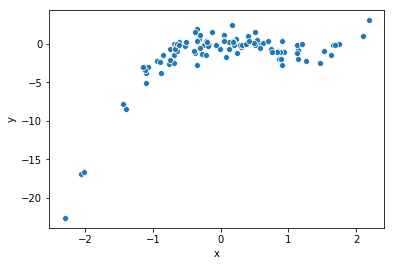

In [17]:
ax = sns.scatterplot(x=x, y=y)
plt.xlabel('x')
plt.ylabel('y')

The above plot shows x plotted against y. It shows a non-linear relationship with some variance. The shape of the plot is has two maxima/minima, typical of a 3rd order polynomial.

### (c) Set a random seed, and then compute the LOOCV errors that result from fitting the following four models using least squares:

- i.  $Y = β_0 + β_1 X + ϵ$  
- ii. $Y = β_0 + β_1 X + β_2 X^2 + ϵ$  
- iii. $Y = β_0 + β_1 X + β_2 X^2 + β_3 X^3 + ϵ$  
- iv. $Y = β_0 + β_1 X + β_2 X^2 + β_3 X^3 + β_4 X^4 + ϵ$  

In [18]:
def mse(y_pred, y):
    """Calculate mean squared error"""
    return np.sum(np.square(y_pred - y)) / y.size


def sim_loocv(seed):
    """Run loocv on simulated data generated with random seed provided"""
    # Generate simulated data
    np.random.seed(seed)
    mu, sigma = 0, 1 # mean and standard deviation
    x  = np.random.normal(mu, sigma, 100)
    y = ((x-2) * (x**2)) + np.random.normal(mu, sigma, 100)
    sim_df = pd.DataFrame({'x': x, 'y': y})
    
    formulae = {'x'   : 'y ~ x', 
                'x^2' : 'y ~ x + np.power(x, 2)',
                'x^3' : 'y ~ x + np.power(x, 2) + np.power(x, 3)',
                'x^4' : 'y ~ x + np.power(x, 2) + np.power(x, 3) + np.power(x, 4)'}
    
    errors = {}
    for f in formulae:
        # predictions state
        y_pred = pd.Series({})
        for i in range(sim_df.shape[0]):
            # Create index for LOOCV
            train = sim_df.index != i
            
            # Linear regression
            model_ols = smf.ols(formula=formulae[f], data=sim_df[train]).fit()
            
            ## Predict
            y_hat   = model_ols.predict(exog=sim_df[~train])
            y_pred  = pd.concat([y_pred, y_hat])
        errors[f] = mse(np.array(y_pred), y)
    
    display(HTML('<h3>MSE</h3>'))
    display(errors)
    
sim_loocv(1)

{'x': 9.710113037214064,
 'x^2': 4.16996357963943,
 'x^3': 0.9268768781648805,
 'x^4': 0.8669116865881077}

### (d) Repeat (c) using another random seed, and report your results. Are your results the same as what you got in (c)? Why?

In [19]:
sim_loocv(2)

{'x': 21.444406970083293,
 'x^2': 5.635014149446473,
 'x^3': 1.2820418215169618,
 'x^4': 1.3165915804276835}

Changing the random seed that is used to simulate the observations has a large effect on the observed mean squared error. 

In changing the random seed we have changed the sample of observations taken from the population, so this change in error is due to variance in our sample. In this case the sample size in is small n=100, and so we might expect quite hi high variance between succesive samples. This would lead to variability between the mse errors observed for different samples of X, Y.

### (e) Which of the models in (c) had the smallest LOOCV error? Is this what you expected? Explain your answer.

In test c), model iv with an $x^4$ term exhibited the lowest error, marginally lower than model iii which also performed well. I expected the lowest error to be observed for model iii) because this is simulated data and we know the true function f(x) in this case is a 3rd order polynomial. 

Interestingly, the second test with a different seed yields the expected result – lowest error for x^3 model.




### (f) Comment on the statistical significance of the coefficient estimates that results from fitting each of the models in (c) using least squares. Do these results agree with the conclusions drawn based on the cross-validation results?

In [20]:
# Generate simulated data
np.random.seed(1)
mu, sigma = 0, 1 # mean and standard deviation
x  = np.random.normal(mu, sigma, 100)
y = ((x-2) * (x**2)) + np.random.normal(mu, sigma, 100)
sim_df = pd.DataFrame({'x': x, 'y': y})

formulae = {'x'  : 'y ~ x', 
            'x^2' : 'y ~ x + np.power(x, 2)',
            'x^3': 'y ~ x + np.power(x, 2) + np.power(x, 3)',
            'x^4' : 'y ~ x + np.power(x, 2) + np.power(x, 3) + np.power(x, 4)'}

errors = {}
for f in formulae:
    # predictions state
    y_pred = pd.Series({})
    for i in range(sim_df.shape[0]):
        # Create index for LOOCV
        train = sim_df.index != i
        
        # Linear regression
        model_ols = smf.ols(formula=formulae[f], data=sim_df[train]).fit()
        
        ## Predict
        y_hat   = model_ols.predict(exog=sim_df[~train])
        y_pred  = pd.concat([y_pred, y_hat])
    errors[f] = mse(np.array(y_pred), y)

display(model_ols.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     350.8
Date:                Fri, 21 Sep 2018   Prob (F-statistic):           1.42e-55
Time:                        19:46:55   Log-Likelihood:                -129.19
No. Observations:                  99   AIC:                             268.4
Df Residuals:                      94   BIC:                             281.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.3031      0.136      2.227      0.028       0.033       0.573
x                 -0.1113      0.184     -0.606      0.546      -0.476       0.253
np.power(x, 2)    -2.5461      0.248    -10.281      0.000      -3.038      -2.054
np.power(x, 3)     1.1059      0.064     17.283      0.000       0.979       1.233
np.power(x, 4)     0.1407      0.057      2.462      0.016       0.027       0.254
==============================================================================
Omnibus:                        1.519   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.468   Jarque-Bera (JB):                1.037
Skew:                          -0.225   Prob(JB):                        0.595
Kurtosis:                       3.221   Cond. No.                         15.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Comment**

The p-values associated with feature-wise t-statsitics for the model show that p < 0.05 for features $x^0$, $x^1$, $x^2$, and $x^4$. Note that there is not enough evidence in this model to reject the null hypothesis for $x^3$, that $H_0: β_3 = 0$.

These statistics suggest that the the strongest model will include features $x^0$, $x^1$, $x^2$, and $x^4$, which supports the conclusions drawn from cross-validations that models iii and iv perfroma best.

## 9. We will now consider the Boston housing data set, from the MASS library.

In [4]:
boston = datasets.load_boston()
boston_feat = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_resp = pd.Series(boston.target).rename('medv')

boston_df = pd.concat([boston_feat, boston_resp], axis=1)

# Check for missing values
#assert boston_df.isnull().sum().sum() == 0

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### (a) Based on this data set, provide an estimate for the population mean of medv. Call this estimate μˆ.

In [5]:
mu_hat = boston_df['medv'].mean()
display(mu_hat)

22.532806324110698

### (b) Provide an estimate of the standard error of μˆ. Interpret this result.
Hint: We can compute the standard error of the sample mean by dividing the sample standard deviation by the square root of the number of observations.

In [6]:
def standard_error_mean(df):
    """Compute estimated standard error of the mean
    with analytic approach"""
    medv = np.array(df)
    SE   = np.std(medv) / np.sqrt(len(medv))
    return SE
display(standard_error_mean(boston_df['medv']))

0.4084569346972866

### (c) Now estimate the standard error of μˆ using the bootstrap. How does this compare to your answer from (b)?

In [8]:
# Compute standard error of the mean with the bootstrap approach

def mean_boot(df, idx):
    Z = np.array(df.loc[idx])
    return np.mean(Z)

def boot_idx(n):
    """Return index for bootstrap sample of size n
    e.g. generate array in range 0 to n, with replacement"""
    return np.random.randint(low=0, high=n, size=n)

def boot(fn, data_df, samples):
    """Perform bootstrap for B number of samples"""
    results = []
    for s in range(samples):
        Z = fn(data_df, boot_idx(data_df.shape[0]))
        results += [Z]
    return np.array(results)

B = 10000
mean_boot  = boot(mean_boot, boston_df['medv'], samples=B)
SE_pred    = np.std(mean_boot) 

print('SE: ' + str(SE_pred))

SE: 0.4059561352313032


The bootstrap method gives a remarkably good estimate of the standard error, when compared to the same estimate derived analytically. The bootstrap approach is computationally more expensive, but has the advantage that no analytic derivation of the standard error for the statistic is required, making it much more general for application to other statistics.

### (d) Based on your bootstrap estimate from (c), provide a 95 % confidence interval for the mean of medv. Compare it to the results obtained using 

```
t.test(Boston$medv)
```

Hint: You can approximate a 95% confidence interval using the formula [μˆ − 2SE(μˆ), μˆ + 2SE(μˆ)].


In [9]:
mu_hat   = np.mean(boston_df['medv'])
conf_low = mu_hat - (2*SE_pred)
conf_hi  = mu_hat + (2*SE_pred)

pd.Series({'mu': mu_hat, 
           'SE': SE_pred,
           '[0.025': conf_low,
           '0.975]': conf_hi})

mu        22.532806
SE         0.405956
[0.025    21.720894
0.975]    23.344719
dtype: float64

### (e) Based on this dataset, provide an estimate, μˆmed, for the median value of medv in the population.

In [10]:
median_hat = np.median(boston_df['medv'])
print('median: ' + str(median_hat))

median: 21.2


### (f) We now would like to estimate the standard error of μˆmed. Unfortunately, there is no simple formula for computing the standard error of the median. Instead, estimate the standard error of the median using the bootstrap. Comment on your findings.

In [13]:
# Compute standard error of the median with the bootstrap approach

def median_boot(df, idx):
    Z = np.array(df.loc[idx])
    return np.median(Z)

def boot_idx(n):
    """Return index for bootstrap sample of size n
    e.g. generate array in range 0 to n, with replacement"""
    return np.random.randint(low=0, high=n, size=n)

def boot(fn, data_df, samples):
    """Perform bootstrap for B number of samples"""
    results = []
    for s in range(samples):
        Z = fn(data_df, boot_idx(data_df.shape[0]))
        results += [Z]
    return np.array(results)

B = 10000
boot_obs   = boot(mean_boot, boston_df['medv'], samples=B)
SE_pred    = np.std(boot_obs) 

print('SE: ' + str(SE_pred))

TypeError: 'numpy.ndarray' object is not callable

The estimated standard error for the median value of medv is similar to the estimated standard error for the mean, which is not suprising we would expect the precision of median and and mean to be related.

### g) Based on this data set, provide an estimate for the tenth percentile of medv in Boston suburbs. Call this quantity μˆ0.1. (You can use the quantile() function.)

In [ ]:
tenth_percentile = np.percentile(boston_df['medv'], 10)
print('tenth_percentile: ' + str(tenth_percentile))

### (h) Use the bootstrap to estimate the standard error of μˆ0.1. Comment on your findings.

In [ ]:
# Compute standard error of the tenth percentile with the bootstrap approach

def tenth_percentile(df, idx):
    Z = np.array(df.loc[idx])
    return np.percentile(Z, 10)

def boot_idx(n):
    """Return index for bootstrap sample of size n
    e.g. generate array in range 0 to n, with replacement"""
    return np.random.randint(low=0, high=n, size=n)

def boot(fn, data_df, samples):
    """Perform bootstrap for B number of samples"""
    results = []
    for s in range(samples):
        Z = fn(data_df, boot_idx(data_df.shape[0]))
        results += [Z]
    return np.array(results)

B = 10000
boot_obs   = boot(tenth_percentile, boston_df['medv'], samples=B)
SE_pred    = np.std(boot_obs) 

print('SE: ' + str(SE_pred))

We observe a standard error for the tenth percentile of 0.5. This error is similar to that observed for median and mean, which we would expect as these stats are related, for example a bootstrap sample with higher mean would likely exhibit a higher tenth percentile as the distribution shifts. 